In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [4]:
data=pd.read_csv('AR_1_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3202188436803748
           A         B         C        D
0   0.411784  1.138076  45.32733  0.31478
1   1.076529  2.549643  44.51848  0.07224
2   0.344893  1.805657  44.32612  0.01430
3   0.290591  1.104069  44.69770  0.00526
4   0.319685  1.767705  44.30242  0.01505
..       ...       ...       ...      ...
64  0.585102  2.337823  44.44021  0.05336
65  0.577945  1.263360  44.54921  0.06313
66  0.724814  2.294153  44.65970  0.01427
67  0.607669  2.162039  44.79900  0.00287
68  0.470268  2.291900  44.18964  0.16066

[69 rows x 4 columns]


In [5]:
data.describe()

,A,B,C,D
count,69.000000,69.000000,69.000000,69.000000
mean,0.703739,2.024182,44.595586,0.053239
std,0.288873,0.466238,0.320219,0.057846
min,0.153155,0.952812,44.084260,0.001460
25%,0.470268,1.844556,44.331250,0.013930
50%,0.671129,2.175012,44.570330,0.031930
75%,0.886289,2.323134,44.799000,0.066890
max,1.513030,2.764420,45.679790,0.314780


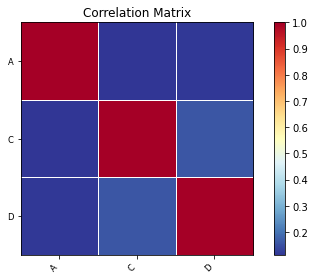

In [6]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.1020788164713943
intercepción b0 is -3.8485254447700457


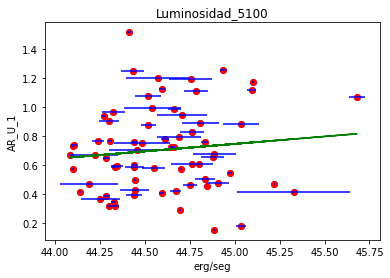

In [9]:

n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_U_1')
plt.savefig("Luminosidad_5100_AR_U_1.pdf")

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('AR_U_1')

NameError: name 'seabornInstance' is not defined

<Figure size 1080x720 with 0 Axes>

In [3]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)



NameError: name 'data' is not defined

In [12]:
data=pd.read_csv('AR_1_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,1]
z=data.iloc[:,2]


print(data)

           A         B        C
0   1.455610  45.32733  0.31478
1   0.943962  44.51848  0.07224
2   0.443118  44.32612  0.01430
3   2.370353  44.69770  0.00526
4   0.432795  44.30242  0.01505
..       ...       ...      ...
74  1.127188  44.77507  0.07369
75  0.516945  44.36424  0.00708
76  0.616204  44.17580  0.04911
77  0.401092  44.40151  0.00523
78  0.401092  44.20654  0.02390

[78 rows x 3 columns]


In [13]:
data.describe()

,A,B,C
count,78.000000,78.000000,78.000000
mean,0.967849,44.581860,0.053644
std,0.621848,0.315274,0.057093
min,0.092030,44.084260,0.001460
25%,0.517930,44.327403,0.014278
50%,0.773988,44.554820,0.033590
75%,1.383634,44.783978,0.070902
max,3.018839,45.679790,0.314780


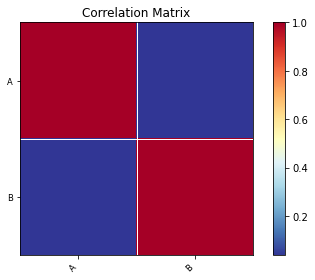

In [21]:
corr = data.set_index('C').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.07458983004739986
intercepción b0 is -2.3575048505585654


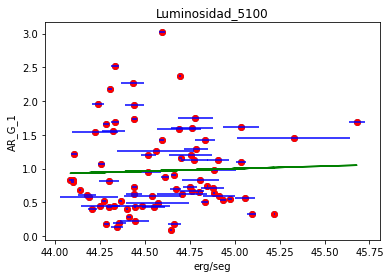

In [19]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_G_1')
plt.savefig("Luminosidad_5100_AR_G_1.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'AR_G_1')

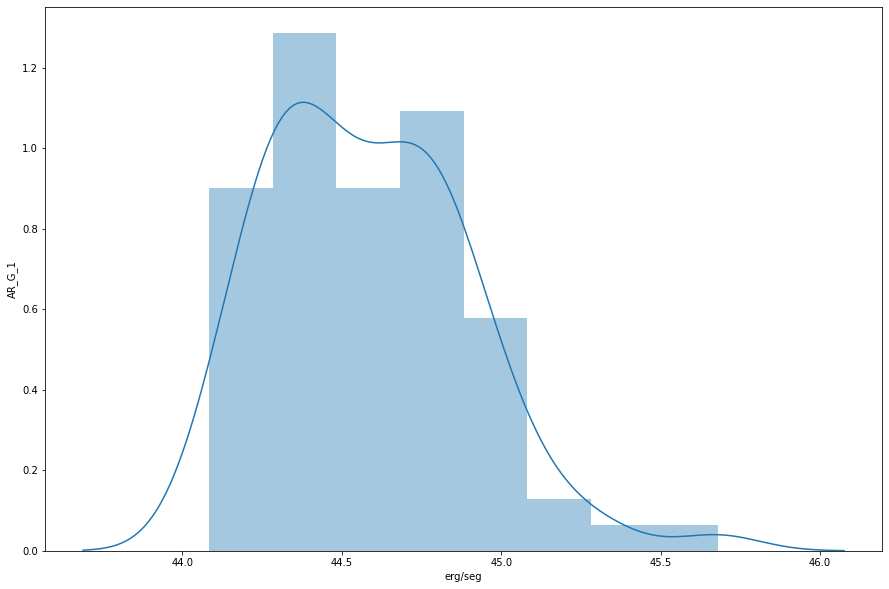

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['B'])
plt.xlabel('erg/seg')
plt.ylabel('AR_G_1')

In [23]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.07458983]
 [1.        ]]
Intercepción: [-2.35750485  0.        ]
Errorcuadratico medio : 0.19059552307721872
Raiz del error cuadratico medio:  0.4365724717354711
 Coeficiente de determinacion R2 :  0.5007150514751951


In [24]:
data=pd.read_csv('AR_1_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]


print(data)

           A         B         C        D
0   0.915703  2.492778  45.32733  0.31478
1   1.132959  2.685760  44.51848  0.07224
2   0.379168  1.790669  44.32612  0.01430
3   0.415966  1.195463  44.69770  0.00526
4   0.449154  2.176936  44.30242  0.01505
..       ...       ...       ...      ...
79  1.486389  2.924665  44.20654  0.02390
80  0.685809  2.241289  44.59746  0.00671
81  0.825946  2.131792  44.17015  0.06091
82  0.890311  2.355310  44.31297  0.01773
83  1.053383  2.431714  44.52867  0.01500

[83 rows x 4 columns]


In [25]:
data.describe()

,A,B,C,D
count,83.000000,83.000000,83.000000,83.000000
mean,0.821633,2.002395,44.581700,0.053440
std,0.501001,0.510977,0.314079,0.057075
min,0.210803,0.885374,44.084260,0.001460
25%,0.482537,1.769383,44.328685,0.014285
50%,0.685809,2.123457,44.549210,0.032770
75%,1.057310,2.381882,44.783135,0.069565
max,2.696403,2.924665,45.679790,0.314780


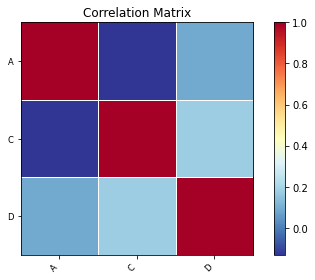

In [26]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.20975722510206754
intercepción b0 is 10.172966275564747


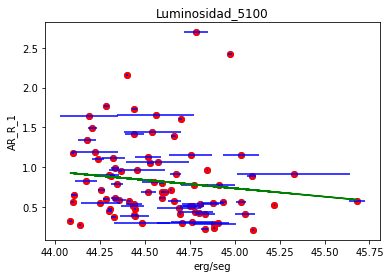

In [27]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_R_1')
plt.savefig("Luminosidad_5100_AR_R_1.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'AR_R_1')

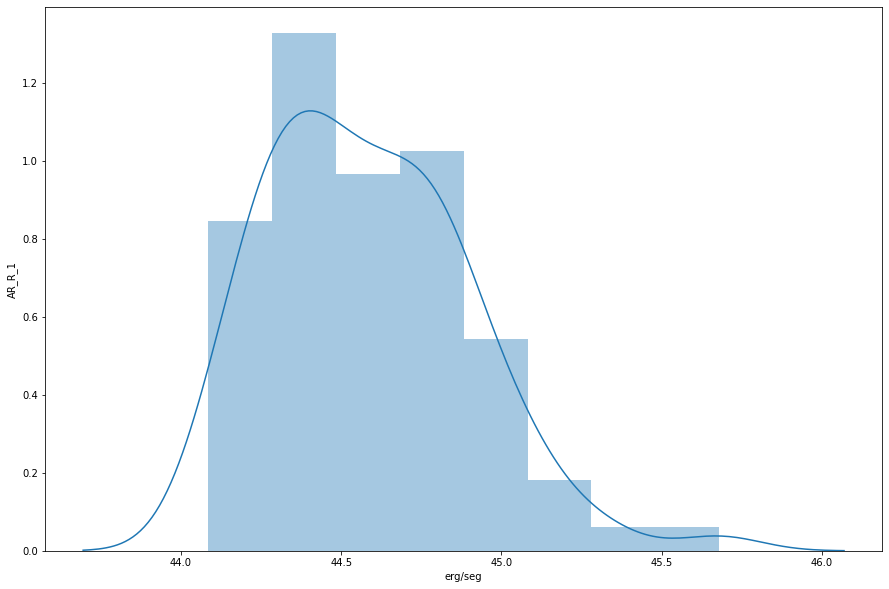

In [31]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('AR_R_1')

In [32]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.20975723]
 [-0.28891548]
 [ 1.        ]]
Intercepción: [ 1.01729663e+01  1.48827384e+01 -7.10542736e-15]
Errorcuadratico medio : 0.16450224256493465
Raiz del error cuadratico medio:  0.40558876040262093
 Coeficiente de determinacion R2 :  0.3496094139710744


In [33]:
data=pd.read_csv('AR_1_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(stats.stdev(y))

print(data)

0.31585761136055107
0.6046422089174578
           A         B         C        D
0   1.471469  2.101748  45.32733  0.31478
1   1.020110  2.439465  44.51848  0.07224
2   0.537924  1.960089  44.32612  0.01430
3   0.343263  1.072385  44.69770  0.00526
4   0.115155  1.468025  44.30242  0.01505
..       ...       ...       ...      ...
78  0.629876  2.066870  44.40151  0.00523
79  0.668968  2.263383  44.20654  0.02390
80  2.652720  1.913659  44.59746  0.00671
81  1.245417  2.582207  44.17015  0.06091
82  0.927963  1.699707  44.31297  0.01773

[83 rows x 4 columns]


In [34]:
data.describe()

,A,B,C,D
count,83.000000,83.000000,83.000000,83.000000
mean,0.855570,2.015319,44.578615,0.053373
std,0.604642,0.475457,0.315858,0.057124
min,0.082994,0.869399,44.084260,0.001460
25%,0.470298,1.890799,44.324415,0.014100
50%,0.663435,2.102792,44.549210,0.032770
75%,1.135736,2.314306,44.783135,0.069565
max,3.149174,2.857454,45.679790,0.314780


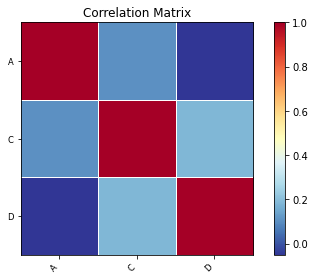

In [35]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.20309046757663446
intercepción b0 is -8.197921769996972


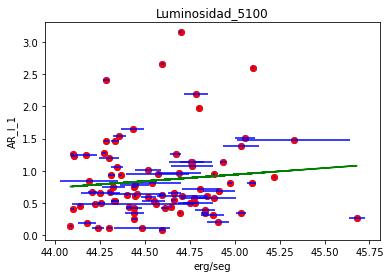

In [36]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_I_1')
plt.savefig("Luminosidad_5100_AR_I_1.pdf")


/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'AR_I_1')

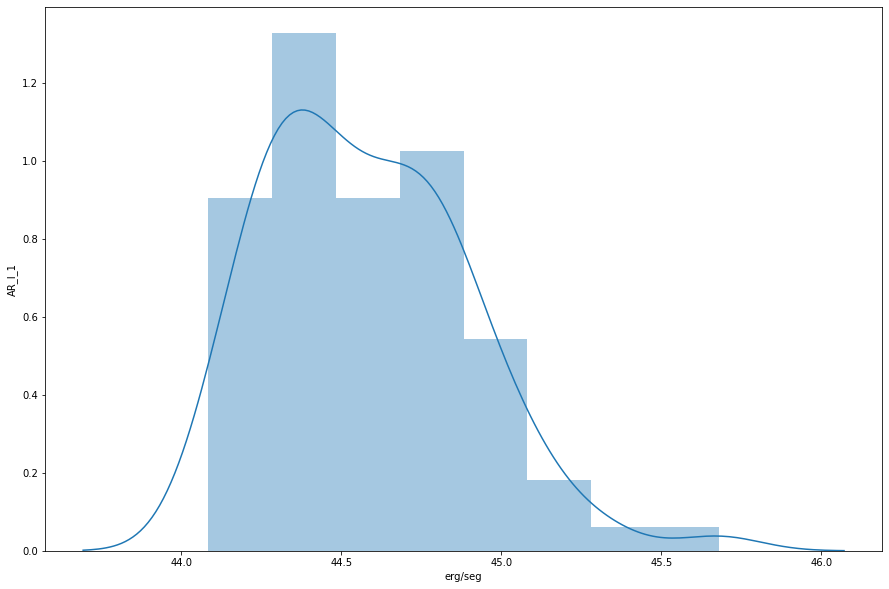

In [37]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('AR_I_1')

In [38]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.20309047]
 [0.04493835]
 [1.        ]]
Intercepción: [-8.19792177e+00  1.20296211e-02  7.10542736e-15]
Errorcuadratico medio : 0.19341956301622124
Raiz del error cuadratico medio:  0.4397949101754376
 Coeficiente de determinacion R2 :  0.33738224722097354


In [39]:
data=pd.read_csv('AR_1_Z.csv',header=1,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(stats.stdev(y))

print(data)

0.3053870181791478
0.2278613151196536
    0.534100960107  2.20721328002  45.32733  0.31478
0         0.544277       2.120358  44.51848  0.07224
1         0.497133       1.987317  44.32612  0.01430
2         0.416236       1.136550  44.69770  0.00526
3         0.731127       2.323023  44.30242  0.01505
4         0.464140       1.168644  44.83574  0.05485
..             ...            ...       ...      ...
73        0.598098       2.188719  44.78145  0.09942
74        0.468889       1.836836  44.77507  0.07369
75        0.782744       2.234345  44.36424  0.00708
76        0.500959       2.157437  44.17580  0.04911
77        0.722118       2.211141  44.40151  0.00523

[77 rows x 4 columns]


In [40]:
data.describe()

,0.534100960107,2.20721328002,45.32733,0.31478
count,77.000000,77.000000,77.000000,77.000000
mean,0.655891,2.043261,44.577104,0.051902
std,0.227861,0.389907,0.305387,0.050364
min,0.205481,1.084697,44.084260,0.001460
25%,0.502938,2.010121,44.331250,0.014270
50%,0.641921,2.135335,44.549210,0.034410
75%,0.782744,2.289490,44.781450,0.072240
max,1.394403,2.614516,45.679790,0.214510


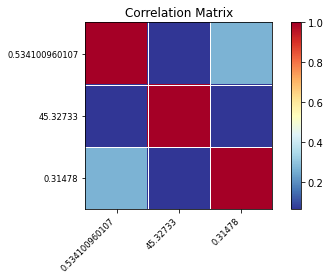

In [42]:
corr = data.set_index('2.20721328002').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.049328969332930406
intercepción b0 is -1.5430512457988756


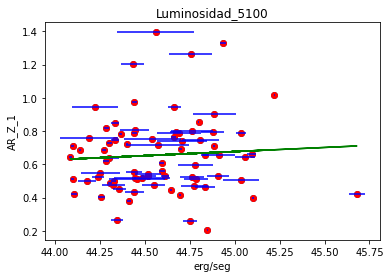

In [43]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_1')
plt.savefig("Luminosidad_5100_AR_Z_1.pdf")


/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'AR_Z_1')

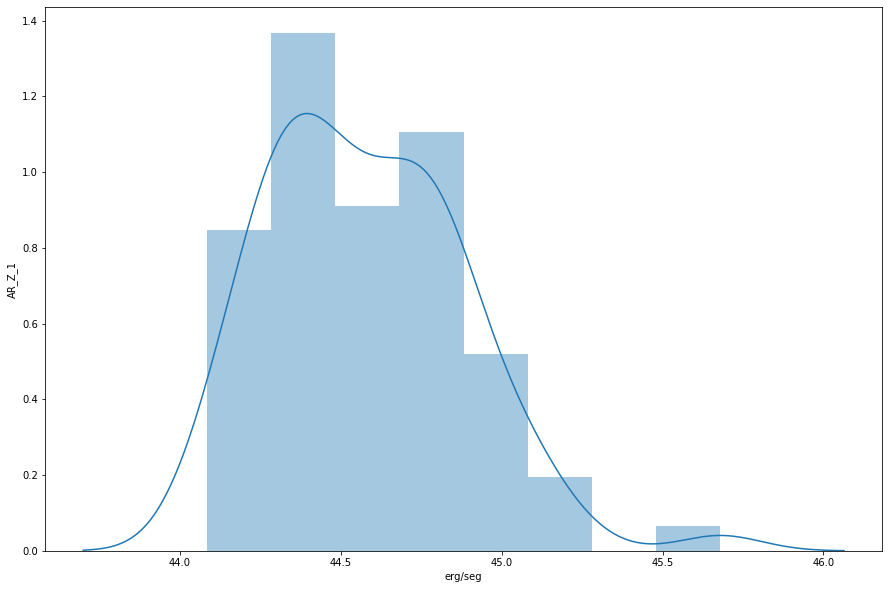

In [45]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['45.32733'])
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_1')

In [46]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.04932897]
 [0.14735653]
 [1.        ]]
Intercepción: [-1.54305125e+00 -4.52546712e+00 -7.10542736e-15]
Errorcuadratico medio : 0.06635881891434461
Raiz del error cuadratico medio:  0.2576020553379662
 Coeficiente de determinacion R2 :  0.33923042706030165
